# Pre-processing steps to improve OCR results

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

## Starting with a GRAYSCALE image

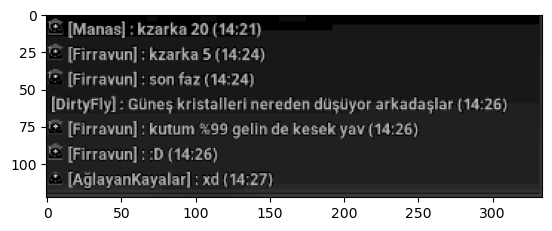

In [2]:
image = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

### Normalize the Image

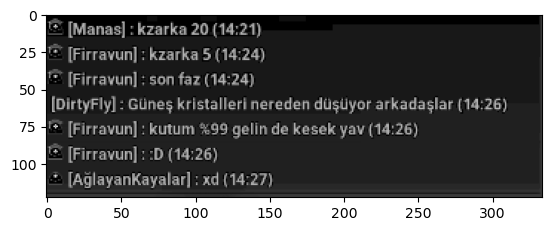

In [3]:
norm_img = np.zeros((image.shape[0], image.shape[1]))
img_norm = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
plt.imshow(img_norm, cmap='gray')

In [4]:
image.shape

(123, 334)

In [64]:
def set_image_dpi(im):
    heigth, width = im.shape
    factor = min(2, float(1024.0 / width))
    size = int(factor * width), int(factor * heigth)
    im_resized = cv2.resize(im, size)
    return im_resized

def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

def to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def thresholding(image):
    return cv2.threshold(image, 0, 200, cv2.THRESH_OTSU)[1]

def sharpen(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened

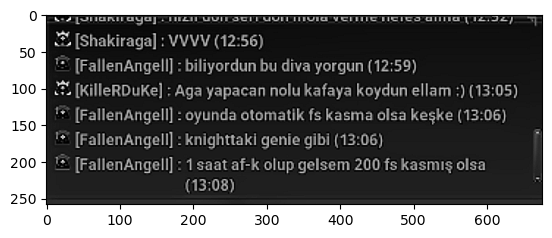

In [67]:
image = cv2.imread('test.png')
img = remove_noise(image)
img = to_grayscale(img)
img = set_image_dpi(img)
img = sharpen(img)
#img = thresholding(img)
plt.imshow(img, cmap='gray')

# OCR step

In [69]:
custom_config = r'-l tur --psm 6'
original_text = pytesseract.image_to_string(img, config=custom_config)
original_text

'D bi L e L e eli a eat e—\n*& (Shakiraga| : VVVV (12:56)\n1 (FallenAngell) : biliyordun bu diva yorgun (12:59)\n(8 İKilleRDuKe| : Aga yapacan nolu kafaya koydun ellam :) (13:05)\nT” (FallenAngeli) : oyunda otomatik fs kasma olsa keşke (13:06)\nT |FallenAngeli) : knighttaki genie gibi (13:06) f\nD (FallenAngeli) : 1 saat af-k olup gelsem 200 fs kasmış olsa\n(13:08)\n'

'™ [Manas] : kzarka 20 (14:21)\n\n> (Firravun] ; kzarka 5 (14:24)\n\n™ [Ficravun| ; son faz (14:24)\n\n[DirtyFly) : Gunes kristallerl nereden duguyor arkadaglar (14:26)\n™ [Firravun] : kutum %99 gelin de kesek yav (14:26)\n\n® [Firravun] : :D (14:26)\n\n* [AglayanKayalar| ; xd (14:27)\n'